<a href="https://colab.research.google.com/github/vmjs1234/CLUSTERING_ASSIGNMENT/blob/main/h)_imagebind_llm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

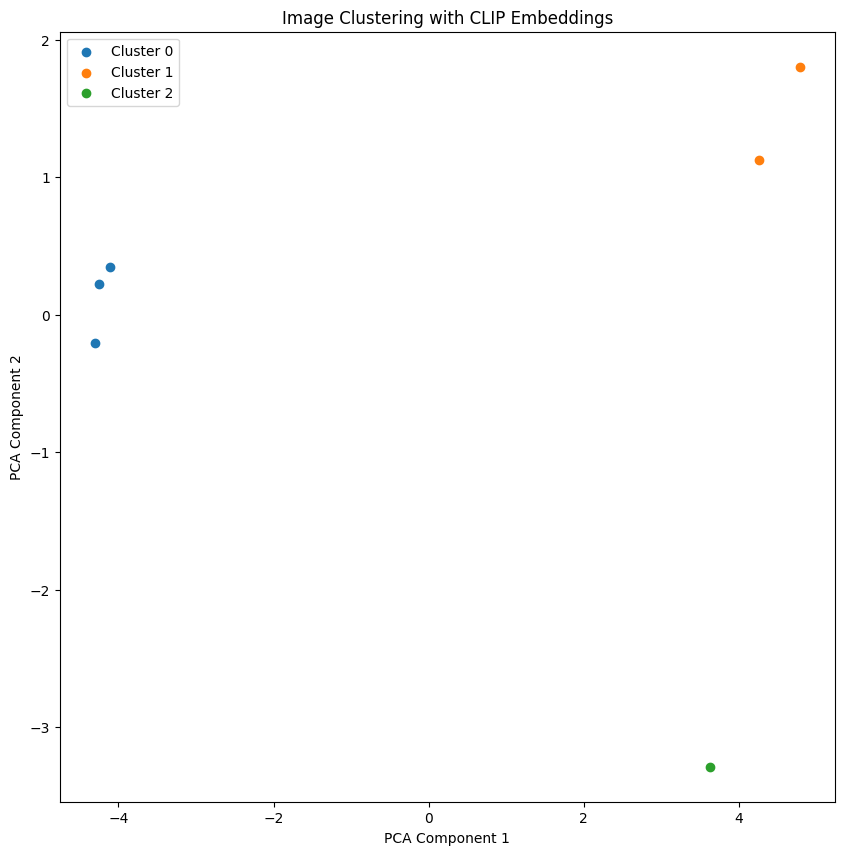

Cluster 0:
- /content/sky1.jpeg
- /content/sky2.jpeg
- /content/sky3.jpeg
Cluster 1:
- /content/app1.jpeg
- /content/app2.jpeg
Cluster 2:
- /content/app3.jpeg


In [8]:
import torch
import clip
from PIL import Image
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Load the CLIP model
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

def get_clip_embedding(image_path):
    """Extract image embedding using CLIP."""
    try:
        image = Image.open(image_path).convert("RGB")
        image_preprocessed = preprocess(image).unsqueeze(0).to(device)
        with torch.no_grad():
            embedding = model.encode_image(image_preprocessed).cpu().numpy().squeeze()
        return embedding
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None

def cluster_images(image_paths, num_clusters):
    """Cluster images using CLIP embeddings."""
    embeddings = []
    valid_image_paths = []
    for image_path in image_paths:
        embedding = get_clip_embedding(image_path)
        if embedding is not None:
            embeddings.append(embedding)
            valid_image_paths.append(image_path)

    if not embeddings:
        print("No valid embeddings found.")
        return

    embeddings = np.array(embeddings)
    kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(embeddings)
    labels = kmeans.labels_

    # Visualize clusters
    visualize_clusters(embeddings, labels, num_clusters)

    # Print clustered images
    for cluster_id in range(num_clusters):
        print(f"Cluster {cluster_id}:")
        for i, label in enumerate(labels):
            if label == cluster_id:
                print(f"- {valid_image_paths[i]}")

def visualize_clusters(embeddings, labels, num_clusters):
    """Visualize clusters in 2D using PCA."""
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)
    reduced_embeddings = pca.fit_transform(embeddings)

    plt.figure(figsize=(10, 10))
    for i in range(num_clusters):
        cluster_points = reduced_embeddings[labels == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i}")

    plt.title("Image Clustering with CLIP Embeddings")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.show()

# Example usage
image_files = ["/content/app1.jpeg", "/content/app2.jpeg", "/content/app3.jpeg","/content/sky1.jpeg","/content/sky2.jpeg","/content/sky3.jpeg"]  # Replace with your image file paths
num_clusters = 3

cluster_images(image_files, num_clusters)


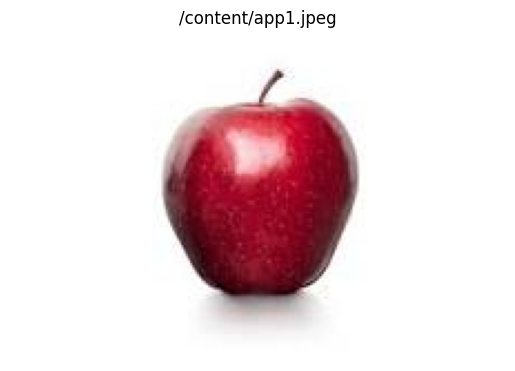

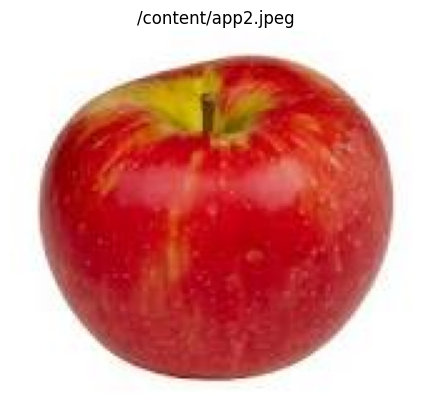

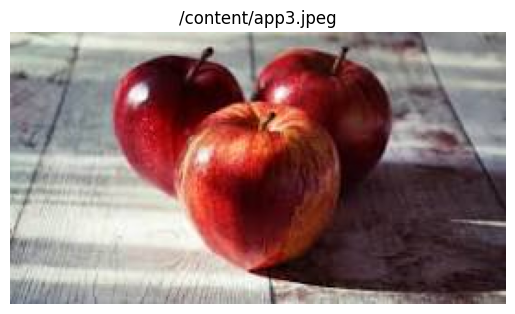

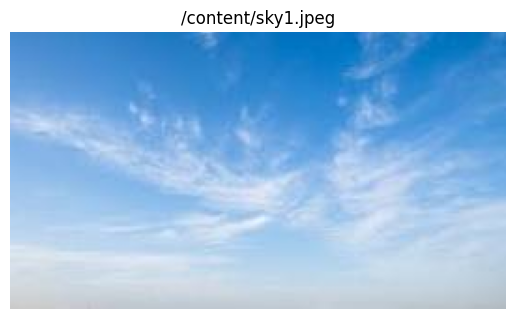

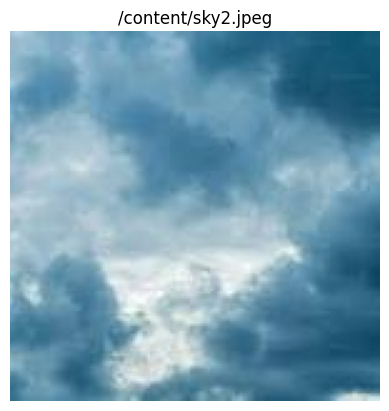

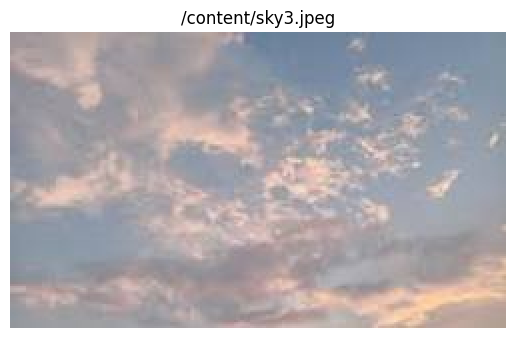

In [10]:


import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Assuming image_files is defined as in the previous code
image_files = ["/content/app1.jpeg", "/content/app2.jpeg", "/content/app3.jpeg","/content/sky1.jpeg","/content/sky2.jpeg","/content/sky3.jpeg"]

for image_file in image_files:
    try:
        img = mpimg.imread(image_file)
        plt.imshow(img)
        plt.title(image_file)
        plt.axis('off')  # Hide axes
        plt.show()
    except FileNotFoundError:
        print(f"Image file not found: {image_file}")
    except Exception as e:
        print(f"Error displaying image {image_file}: {e}")